<a href="https://colab.research.google.com/github/samz5320/deeplearning/blob/main/digit_recog_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [46]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [47]:
len(x_train)

60000

In [48]:
len(x_test)

10000

In [49]:
x_train[0].shape

(28, 28)

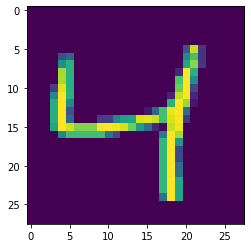

In [50]:
plt.imshow(x_train[2])

In [51]:
y_train[2]

4

In [52]:
x_train.shape

(60000, 28, 28)

In [53]:
x_train=x_train/255
x_test=x_test/255

In [54]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28) 

In [55]:
x_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
model=keras.Sequential([
                        layers.Dense(10,input_shape=(784,),activation="sigmoid")])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4675 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3042 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2664 - accuracy: 0.9255


In [61]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2727 - accuracy: 0.9241


[0.27267828583717346, 0.9240999817848206]

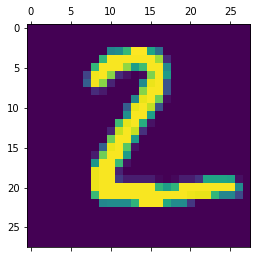

In [69]:
plt.matshow(x_test[1])

In [71]:
y_pred=model.predict(x_test_flattened)
y_pred[1]
np.argmax(y_pred[1])

2

In [73]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[0:5]

[7, 2, 1, 0, 4]

In [74]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    2,    0,    4,    2,    1,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [  10,    9,  924,   20,    6,    1,   10,    8,   40,    4],
       [   4,    0,   17,  933,    0,   14,    2,    6,   26,    8],
       [   2,    3,    9,    2,  889,    0,    9,    4,   13,   51],
       [  11,    3,    6,   46,    6,  761,   10,    4,   38,    7],
       [  19,    3,    9,    1,    7,   10,  903,    1,    5,    0],
       [   3,   10,   23,    8,    8,    1,    0,  925,    5,   45],
       [   8,    9,    7,   19,    9,   20,    8,    4,  883,    7],
       [  11,    7,    1,   11,   15,    5,    0,    8,   12,  939]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

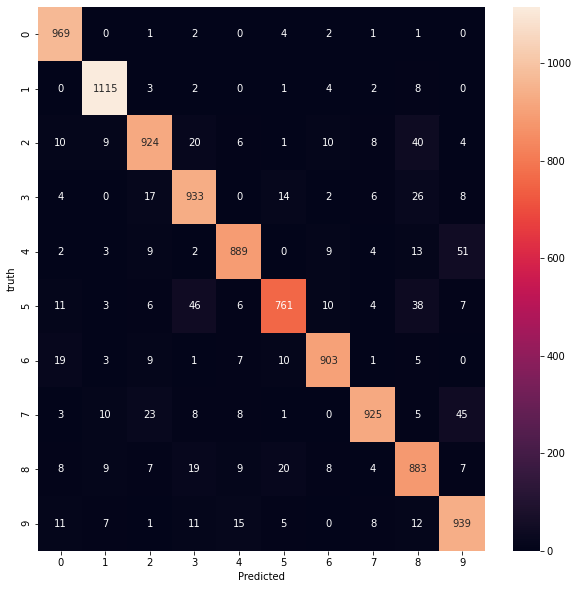

In [77]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("truth")

In [82]:
model=keras.Sequential([
                        layers.Dense(150,input_shape=(784,),activation="silu"),
                        layers.Dense(10,activation="sigmoid")])




model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2689 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1111 - accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0716 - accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0509 - accuracy: 0.9843
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0366 - accuracy: 0.9886


In [87]:
model=keras.Sequential([
                        layers.Flatten(input_shape=(28,28)),
                        layers.Dense(150,input_shape=(784,),activation="silu"),
                        layers.Dense(10,activation="sigmoid")])




model.compile(optimizer="nadam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2673 - accuracy: 0.9240
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1095 - accuracy: 0.9673
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0719 - accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0513 - accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0369 - accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0285 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0210 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0173 - accuracy: 0.9947
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0137 - accuracy: 0.9957
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.010